<!-- dom:TITLE: 2MA100 - Devoir Maison 1 -->
# 2MA100 - Devoir Maison 1
<!-- dom:AUTHOR: Sorbonne Université - 2 mars 2020 -->
<!-- Author: -->  
**Sorbonne Université - 2 mars 2020**

Les exercices de ce devoir maison noté sur 20 points doivent être rendus au choix au format **Notebook** (`.ipynb`) ou **Script** (`.py`) en un ou plusieurs fichiers au plus tard le **13 mars 2020** à 23h59 sur [moodle](https://moodle-sciences.upmc.fr/moodle-2019/).


**Attention Plagiat !**


Les devoirs maisons doivent être codés et rendus de manière individuelle. A titre d'information,
voici une définition du plagiat adaptée du [Memento de l'Université de Genève](https://memento.unige.ch/doc/0008/) :

*Le plagiat consiste à insérer, dans un travail académique, des formulations, des
phrases, des passages, des morceaux de code, des images, de même que des idées ou
analyses repris de travaux d'autres auteurs, en les faisant passer pour siens.*

En particulier, le copier-coller à partir de sources trouvées sur Internet ou sur des travaux d'autres
étudiant·es sans citer les sources est considéré comme du plagiat et implique une note zéro.
Le plagiat constitue également une tentative de tricherie sanctionnée par
le règlement de l'université. La solution est d'indiquer dans vos devoirs tout de ce qui ne vient
pas de vous en mentionnant les sources (page Internet, livres, autre étudiant·e,...). Tout les
fichiers rendus seront analysés automatiquement avec un logiciel de détection des similarités
(entre étudiant·es et depuis Internet).





<!-- --- begin exercise --- -->

# Exercice 1: Nombre d'or

On s'intéresse ici à une approximation du nombre d'or, $\varphi = \dfrac{1+\sqrt{5}}{2}$.

On définit tout d'abord la suite $(F_n)_{n\geqslant0}$ par $F_0=F_1=1$ et $F_{n}=F_{n-1}+F_{n-2}$ pour $n\ge 2$. On a alors le résultat suivant,

$$
\lim_{n \rightarrow +\infty} \dfrac{F_{n+1}}{F_{n}} = \varphi.
$$

**a)**
Écrire une fonction `Fibo(epsilon)` qui, à $\varepsilon$ précision donnée, renvoie le plus petit entier $n$ tel que $\left| \varphi - \dfrac{F_{n+1}}{F_{n}} \right| < \varepsilon$.



In [1]:
from math import sqrt

# Calcul de phi
phi = (1 + sqrt(5)) / 2

def Fibo(epsilon):

    # Initialisation
    F1, F0 = 1, 1
    cond = abs(phi - F1 / F0) < epsilon
    n = 0
    
    # Tant que la condition n'est pas vérifiée
    while not cond:
        
        # Mise à jour des variables
        F1, F0 = F1 + F0, F1
        cond = abs(phi - F1 / F0) < epsilon
        n += 1
        
    return n


On souligne également que $\varphi$ est l'unique solution positive de l'équation $x^2-x-1=0$.

**b)**
Écrire une nouvelle fonction `Newton(epsilon, x0)` qui, à $\varepsilon$ précision donnée, renvoie le plus petit entier $k$
 tel que $\left| \varphi - x_k \right| < \varepsilon$ où $x_k$ est déterminé par la méthode de Newton appliquée à $f(x)=x^2-x-1$ dont on rappelle le principe:

$$
x_{k+1} = x_k - \dfrac{f(x_k)}{f^\prime(x_k)} \,, \quad k \ge 0.
$$

En pratique on choisira $x_0=3$.



In [2]:
def Newton(epsilon, x0=3):
    
    # Création de la fonction dont phi est un zéro et de sa dériv"e
    def f(y):
        return y ** 2 - y - 1
    def df(y):
        return 2 * y - 1

    # Initialisation
    x = x0
    cond = abs(phi - x) < epsilon
    n = 0
    
    # Tant que la condition n'est pas vérifiée
    while not cond:
        
        # Mise à jour des variables
        x -= f(x) / df(x)
        cond = abs(phi - x) < epsilon
        n += 1
        
    return n


**c)**
Pour $\varepsilon = 10^{-i}$ et $i \in \{2, 4, 6, 8\}$ comparer le nombre d'itérations nécessaire entre les deux stratégies proposées pour approximer $\varphi$ à précision donnée. Quelle stratégie vous semble la plus *efficace* ?



In [3]:
for epsilon in (10 ** - k for k in range(2, 9, 2)):
    print("epsilon = {:0.0E}".format(epsilon))
    print("Nombre d'itérations avec Fibo =", Fibo(epsilon))
    print("Nombre d'itérations avec Newton =", Newton(epsilon))
    print()

epsilon = 1E-02
Nombre d'itérations avec Fibo = 5
Nombre d'itérations avec Newton = 3

epsilon = 1E-04
Nombre d'itérations avec Fibo = 10
Nombre d'itérations avec Newton = 4

epsilon = 1E-06
Nombre d'itérations avec Fibo = 15
Nombre d'itérations avec Newton = 4

epsilon = 1E-08
Nombre d'itérations avec Fibo = 19
Nombre d'itérations avec Newton = 5



La méthode de Newton semble plus efficace (moins d'itérations).

**d)** Et qu'en est-il si on initialise la méthode de Newton par $x_0=0$ ?

In [4]:
for epsilon in (10 ** - k for k in range(2, 9, 2)):
    print("epsilon = {:0.0E}".format(epsilon))
    print("Nombre d'itérations avec Fibo =", Fibo(epsilon))
    print("Nombre d'itérations avec Newton =", Newton(epsilon, x0=0))
    print()

epsilon = 1E-02
Nombre d'itérations avec Fibo = 5


KeyboardInterrupt: 

La méthode de Newton ne converge pas car elle converge vers l'autres zéro de la fonction $f(x) = x^2 - x - 1$ qui est $\frac{1 - \sqrt{5}}{2}$.

En effet, $\frac{f(0)}{df(0)} = 1$ donc $x_1 = - 1 < 0$ et ainsi de suite, la suite $(x_n)_n$ s'éloignant de $\varphi$.

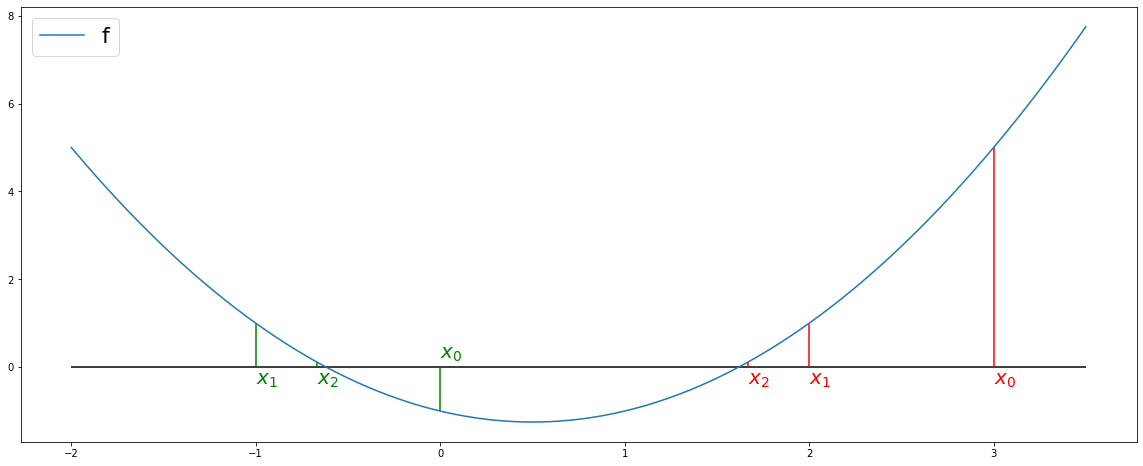

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(y):
    return y ** 2 - y - 1

def df(y):
    return 2 * y - 1

plt.figure(figsize=(20, 8))
plt.plot(np.linspace(-2, 3.5, 1000), f(np.linspace(-2, 3.5, 1000)), label='f')
plt.hlines(0, -2, 3.5, color='k')

for color, x0 in zip(('r', 'g'), (3, 0)):
    
    # On affiche x0
    plt.vlines(x0, 0, f(x0), color=color)
    if f(x0) > 0:
        plt.text(x0, - 0.4, r'$x_{0}$', fontsize=20, color=color)
    else:
        plt.text(x0, 0.2, r'$x_{0}$', fontsize=20, color=color)

    # On affiche x_i pour i allant de 1 à 4
    for i in range(1, 3):
        x0 -= f(x0) / df(x0)
        plt.vlines(x0, 0, f(x0), color=color)
        if f(x0) > 0:
            plt.text(x0, - 0.4, r'$x_{:}$'.format(i), fontsize=20, color=color)
        else:
            plt.text(x0, 0.2, r'$x_{:}$'.format(i), fontsize=20, color=color)
    
plt.legend(loc='best', fontsize=22);




<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercice 2: Matrice de Vandermonde

Soit $p, n\in \mathbb{N}^*$ et $x := (x_1, \ldots, x_p) \in \mathbb{R}^p$, on introduit la matrice $V(x,n)$ définit par:

$$
V(x,n)=\begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^{n-1} & x_1^n \\ 
1 & x_2 & x_2^2 & \cdots & x_2^{n-1} & x_2^n \\ 
\vdots & \vdots& \vdots & \ddots & \vdots & \vdots\\ 
1 & x_{p-1} & x_{p-1}^2 & \cdots & x_{p-1}^{n-1} & x_{p-1}^n \\ 
1 & x_p & x_p^2 & \cdots & x_p^{n-1} & x_p^n
\end{pmatrix}.
$$

**a)**
Écrire une fonction qui construit la matrice $V(x,n)$ élément par élément à l'aide d'une double boucle.



In [6]:
def vandermonde_1(x, n):

    # Récupérer la longueur du vecteur x
    p = len(x)
    
    # Création de la matrice V
    V = np.empty((p, n + 1))
    
    # Remplissage de V avec une double boucle for
    for i in range(p):
        for j in range(n + 1):
            V[i, j] = x[i] ** j

    return V


**b)**
Après avoir établi une relation permettant d'écrire la $k$-ième colonne de $V(x,n)$ uniquement en fonction de $x$ et de $k$, écrire une seconde fonction qui construit la matrice $V(x,n)$ colonne par colonne à l'aide de cette relation.



In [7]:
def vandermonde_2(x, n):

    # Récupérer la longueur du vecteur x
    p = len(x)
    
    # Création de la matrice V
    V = np.empty((p, n + 1))
    
    # Remplissage de V avec une boucle for de manière indépendente
    for j in range(n + 1):
        V[:, j] = x ** j

    return V


**c)**
Après avoir établi une relation entre la $k$-ième colonne de $V(x,n)$, sa $(k-1)$-ième colonne et le vecteur $x$, écrire une troisième fonction qui construit la matrice $V(x,n)$ colonne par colonne à l'aide de cette relation.



In [8]:
def vandermonde_3(x, n):

    # Récupérer la longueur du vecteur x
    p = len(x)
    
    # Création de la matrice V
    V = np.ones((p, n + 1))
    
    # Remplissage de V avec une boucle for avec la relation de récurrence
    for j in range(1, n + 1):
        V[:, j] = V[:, j - 1] * x

    return V


**d)**
Comparer les temps d'exécution de ces trois fonctions pour $n=150$, $p=100$ et $x$ généré aléatoirement.



In [9]:
import numpy as np

n, p = 150, 100
x = np.random.randn(p)

# Calcul des matrices de Vandermonde avec les trois fonctions
V1 = vandermonde_1(x, n)
V2 = vandermonde_2(x, n)
V3 = vandermonde_3(x, n)

# On vérifie que les matrices sont identiques pour les trois fonctions
np.testing.assert_allclose(V1, V2)
np.testing.assert_allclose(V1, V3)
np.testing.assert_allclose(V2, V3)

In [10]:
%timeit vandermonde_1(x, n)

6.05 ms ± 58.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%timeit vandermonde_2(x, n)

519 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%timeit vandermonde_3(x, n)

249 µs ± 7.61 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)




<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercice 3: Reconnaissance de chiffres manuscrits

Le but de cet exercice est d'écrire un programme de classification d'image de chiffres manuscrits.
Ceci fut l'une des premières applications industrielles du machine learning à la lecture automatique des chèques ou des codes postaux.

Les instructions suivantes permettent de charger un jeu de données de chiffres manuscrits numérisés disponible dans le package `scikit-learn` (nom d'import `sklearn`):

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

Ainsi `X`  est un tableau Numpy qui contient de nombreux exemples de chiffres manuscrits numérisées en image de 8x8 pixels stockés sous la forme de tableau de 64 nombres entiers stockés en flottants.
La variable `y` contient l'entier entre 0 et 9 correspondant au chiffre numérisé. On parle de *label*.


**a)**
Quelle commande Python permet de connaître les dimensions de `X` et `y` et ainsi de connaître le nombre d'exemples contenus dans la base de données?



In [14]:
print("Dimensions de X =", X.shape)
print("Dimensions de y =", y.shape)

Dimensions de X = (1797, 64)
Dimensions de y = (1797,)



**b)**
Afficher à l'aide de la commande `print` les données contenus dans `X` associées à l'indice `idx=12`? Il s'agit donc de la douzième ligne du tableau `X`.



In [15]:
print(X[12])

[ 0.  0.  5. 12.  1.  0.  0.  0.  0.  0. 15. 14.  7.  0.  0.  0.  0.  0.
 13.  1. 12.  0.  0.  0.  0.  2. 10.  0. 14.  0.  0.  0.  0.  0.  2.  0.
 16.  1.  0.  0.  0.  0.  0.  6. 15.  0.  0.  0.  0.  0.  9. 16. 15.  9.
  8.  2.  0.  0.  3. 11.  8. 13. 12.  4.]



**c)**
À l'aide des fonctions `reshape` de Numpy et `imshow` de Matplotlib afficher l'image d'indice `idx=12`.
Il est possible d'utiliser l'argument `cmap='gray'` dans l'appel de `imshow` pour afficher le résultat en niveau de gris.
Quel chiffre est ainsi codé?



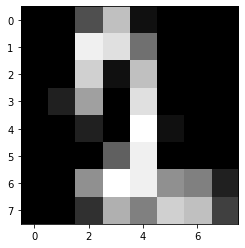

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X[12].reshape(8, 8), cmap='gray')

C'est un 2, mais ce n'est pas évident, donc on peut vérifier le label. 

In [17]:
y[12]

2


Pour chacune des classes de chiffre (de 0 à 9), on souhaite calculer son centroïde, *i.e.* la représentation "moyenne" d'une classe.

**d)**
Comment définir les sous-tableaux de `X` et de `y` correspondant à tous les chiffres 0 numérisés?



In [18]:
X_0 = X[y == 0]
y_0 = y[y == 0]


**e)**
Pour l'ensemble des 0 de la question précédente, calculer pour chaque pixel la valeur moyenne, afin de définir le "zéro moyen".



In [19]:
X_0.mean(axis=0)

array([0.00000000e+00, 2.24719101e-02, 4.18539326e+00, 1.30955056e+01,
       1.12977528e+01, 2.92696629e+00, 3.37078652e-02, 0.00000000e+00,
       0.00000000e+00, 8.87640449e-01, 1.25786517e+01, 1.33707865e+01,
       1.14943820e+01, 1.13764045e+01, 9.66292135e-01, 0.00000000e+00,
       0.00000000e+00, 3.73033708e+00, 1.42752809e+01, 5.26404494e+00,
       2.10112360e+00, 1.21685393e+01, 3.52247191e+00, 0.00000000e+00,
       0.00000000e+00, 5.29213483e+00, 1.27134831e+01, 1.99438202e+00,
       1.40449438e-01, 9.06179775e+00, 6.44943820e+00, 0.00000000e+00,
       0.00000000e+00, 5.87078652e+00, 1.15561798e+01, 8.93258427e-01,
       4.49438202e-02, 8.77528090e+00, 7.12359551e+00, 0.00000000e+00,
       0.00000000e+00, 3.49438202e+00, 1.32865169e+01, 1.65168539e+00,
       1.53370787e+00, 1.13089888e+01, 5.85393258e+00, 0.00000000e+00,
       0.00000000e+00, 7.97752809e-01, 1.30561798e+01, 9.96067416e+00,
       1.03483146e+01, 1.32528090e+01, 2.41573034e+00, 0.00000000e+00,
      


**f)**
Pour l'ensemble des chiffres de 0 à 9 tracer sur une même ligne  (à l'aide de la fonction `subplot` de Matplotlib et en initialisant la figure avec `plt.figure(figsize=(20,2))`) l'image moyenne associée:
<!-- dom:FIGURE: [fig/reconnaissance-chiffres.png, width=1000 frac=0.8] -->
<!-- begin figure -->

<p></p>
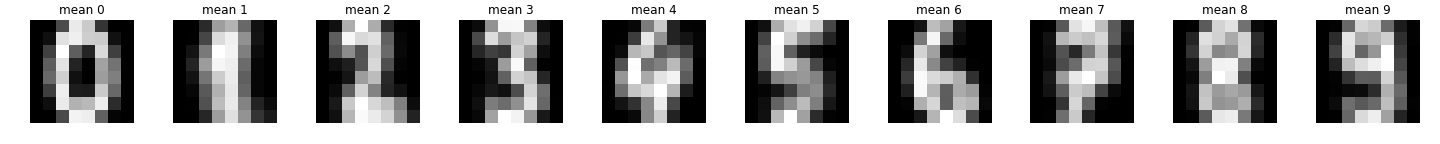

<!-- end figure -->




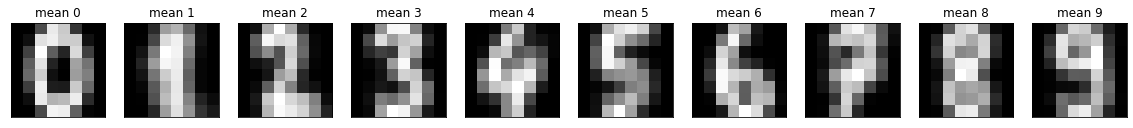

In [20]:
plt.figure(figsize=(20, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X[y == i].mean(axis=0).reshape(8, 8), cmap='gray')
    plt.title('mean {}'.format(i))
    plt.xticks([]);
    plt.yticks([]);


Finalement, nous allons implémenter notre propre classifieur: pour une nouvelle image de chiffre numérisé, on prédit la classe dont le chiffre moyen est le plus proche.
Pour cela on partage notre jeu de données en deux parties de tailles semblables:
la première partie servira de données d'entraînement (`X_train` et `y_train`); la seconde partie servira de données de tests (`X_test` et `y_test`).

**g)**
Définir les variables: `X_train`, `y_train`, `X_test` et `y_test`.



In [21]:
# Récupérer le nombre d'images et le diviser par deux.
# On utilise la division euclidienne pour avoir un entier.
n_samples = len(y)
half = n_samples // 2

# On divise le jeu de données en deux parts égales en coupant à la moitié
X_train, y_train, X_test, y_test = X[:half], y[:half], X[half:], y[half:]


**h)**
Pour chaque chiffre de l'ensemble d'entraînement, calculer les centroïdes (*i.e.* les chiffres moyens) des classes de 0 à 9.
On notera la variable contenant l'ensemble des moyennes `centroids_train`.



In [22]:
# On crée un array de la taille (10, 64)
# Le premier axe correspond aux centroïdes
# Le second axe correspond aux valeurs des centroïdes
centroids_train = np.empty((10, X_train.shape[1]))
for i in range(10):
    centroids_train[i] = X_train[y_train == i].mean(axis=0)


**i)**
Pour chaque chiffre de l'ensemble de test (`X_test`), calculer le centroïde appartenant à `centroids_train` le plus proche (dans la norme euclidienne).



In [23]:
# On calcule la norme euclidienne entre chaque vecteur du jeu de test
# et chaque centroïde puis on prend l'argmin.
nearest_centroids = np.linalg.norm(X_test[:, None] - centroids_train[None, :], axis=-1).argmin(axis=-1)


**j)**
Finalement, évaluer si le chiffre ainsi obtenu correspond au vrai chiffre en utilisant `y_test`
et en déduire une estimation du pourcentage de bonnes prédictions sur l'ensemble de test.



In [24]:
print("Pourcentage de bonnes prédictions sur l'ensemble de test = {:%}"
      .format((y_test == nearest_centroids).mean()))

Pourcentage de bonnes prédictions sur l'ensemble de test = 87.541713%
